In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, svm, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


class Dataset:
    def __init__(self, dataset_pd):
        dataset_pd.drop(['jobId', 'companyId',
                         'milesFromMetropolis', 'degree',
                         'major', 'industry'],
                        axis=1, inplace=True)

        # Normalizacja tekstu
        dataset_pd.loc[dataset_pd['jobType'] == 'CEO', 'jobType'] = 0
        dataset_pd.loc[dataset_pd['jobType'] == 'CFO', 'jobType'] = 1
        dataset_pd.loc[dataset_pd['jobType'] == 'CTO', 'jobType'] = 2
        dataset_pd.loc[dataset_pd['jobType'] == 'VICE_PRESIDENT', 'jobType'] = 3
        dataset_pd.loc[dataset_pd['jobType'] == 'JUNIOR', 'jobType'] = 4
        dataset_pd.loc[dataset_pd['jobType'] == 'SENIOR', 'jobType'] = 5
        dataset_pd.loc[dataset_pd['jobType'] == 'JANITOR', 'jobType'] = 6
        dataset_pd.loc[dataset_pd['jobType'] == 'MANAGER', 'jobType'] = 7

        self.dataset_pd = dataset_pd

    def __str__(self):
        return self.dataset_pd.to_string(index=False, max_rows=5)

    def data_statistic(self):
        print('describe: \n', self.dataset_pd.describe())
        print('\nInfo: \n', self.dataset_pd.info())
        print('\nIs null: \n', self.dataset_pd.isnull().values.any())

    def data_histogram(self):
        self.dataset_pd['salary'].hist()

    def plot_data(self):
        print('\nrozkład danych:\n')
        self.dataset_pd['salary'].plot.box()

    def plot_kde(self):
        self.dataset_pd['salary'].plot.kde()


class Correlation(Dataset):
    def __init__(self, dataset_ins):
        super().__init__(dataset_ins)
        self.accuracy_compare = None
        self.X = self.dataset_pd.drop('salary', axis=1).to_numpy()
        self.y = np.where(self.dataset_pd['salary'] >= 100, 1, 0)
        self.dataset_pd.fillna(self.dataset_pd.mean(), inplace=True)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,
                                                                                self.y,
                                                                                test_size=0.2,
                                                                                random_state=12345)

    def matrix(self):
        fig, ax = plt.subplots(figsize=(10, 10))
        colormap = sns.color_palette("BrBG", 10)

        sns.heatmap(self.dataset_pd.corr(),
                    cmap=colormap,
                    annot=True,
                    fmt=".2f")

        ax.set_yticklabels(self.dataset_pd.columns)
        plt.show()

    def train(self, classifier):
        classifier.fit(self.X_train, self.y_train)

        predictions = classifier.predict(self.X_test)

        scores = list(metrics.precision_recall_fscore_support(predictions, self.y_test))
        score_vals = [scores[0][0],
                      scores[1][0],
                      scores[2][0],
                      metrics.accuracy_score(predictions, self.y_test)]

        return score_vals

    def models(self):
        # MODEL 1 - regresja logistyczna
        accuracy = self.train(linear_model.LogisticRegression())
        self.accuracy_compare = {'LR': accuracy}
        print("LR: ", accuracy)

        # MODEL 2 - Support Vector Machine
        accuracy = self.train(svm.SVC())
        self.accuracy_compare['SVM'] = accuracy
        print("SVM", accuracy)

        # MODEL 3 - Random Forest Tree
        accuracy = self.train(ensemble.RandomForestClassifier())
        self.accuracy_compare['RF'] = accuracy
        print("RF: ", accuracy)

        # MODEL 4 - Decision Tree
        accuracy = self.train(tree.DecisionTreeClassifier())
        self.accuracy_compare['DT'] = accuracy
        print("DT: ", accuracy)

        # MODEL 5 - neural network
        accuracy = self.train(MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000))
        self.accuracy_compare['neural network'] = accuracy
        print("neural network", accuracy)

        np.save('./accuracy', self.accuracy_compare)

        # Porownywanie modeli
        df_compare = pd.DataFrame(self.accuracy_compare,
                                  index=['precision', 'recall', 'f1 score', 'accuracy'])
        df_compare.plot(kind='bar')

    def correcting(self):
        # działania korygujące - hiperparametry

        # MODEL 6 - Support Vector Machine
        accuracy = self.train(svm.SVC(gamma='auto'))
        self.accuracy_compare['SVM'] = accuracy
        print("SVM gamma='auto'", accuracy)

        # MODEL 7 - Support Vector Machine
        accuracy = self.train(svm.SVC(kernel='sigmoid'))
        self.accuracy_compare['SVM'] = accuracy
        print("SVM kernel='sigmoid'", accuracy)

        # MODEL 8 - Support Vector Machine
        accuracy = self.train(svm.SVC(degree=4))
        self.accuracy_compare['SVM'] = accuracy
        print("SVM degree=4", accuracy)

In [2]:
first_frame = pd.read_csv('train_dataset.csv')
second_frame = pd.read_csv('train_salaries.csv')
salary = pd.merge(first_frame, second_frame, on='jobId')

correlation = Correlation(salary.iloc[:100000, :])
print(correlation)

 jobType  yearsExperience  salary
       1               10     130
       0                3     101
     ...              ...     ...
       2               12     113
       4               19     125


C:\Users\user\AppData\Local\Temp\ipykernel_18072\2534017090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_pd.drop(['jobId', 'companyId',
C:\Users\user\AppData\Local\Temp\ipykernel_18072\2534017090.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset_pd.fillna(self.dataset_pd.mean(), inplace=True)


In [3]:
# analiza danych statystycznych
correlation.data_statistic()

describe: 
              jobType  yearsExperience         salary
count  100000.000000     100000.00000  100000.000000
mean        3.502180         11.94206     115.821400
std         2.293052          7.20478      38.710017
min         0.000000          0.00000       0.000000
25%         1.000000          6.00000      88.000000
50%         4.000000         12.00000     114.000000
75%         6.000000         18.00000     141.000000
max         7.000000         24.00000     292.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   jobType          100000 non-null  int64
 1   yearsExperience  100000 non-null  int64
 2   salary           100000 non-null  int64
dtypes: int64(3)
memory usage: 3.1 MB

Info: 
 None

Is null: 
 False


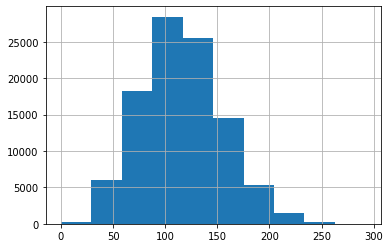

In [4]:
# rozkład
correlation.data_histogram()


rozkład danych:



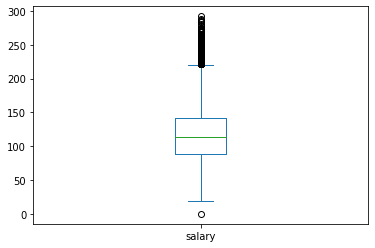

In [5]:
# rozkład
correlation.plot_data()

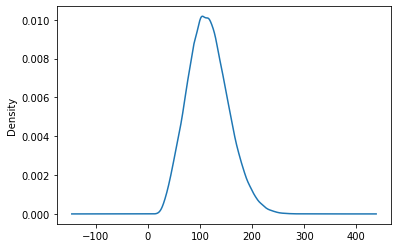

In [6]:
# rozkład kde
correlation.plot_kde()

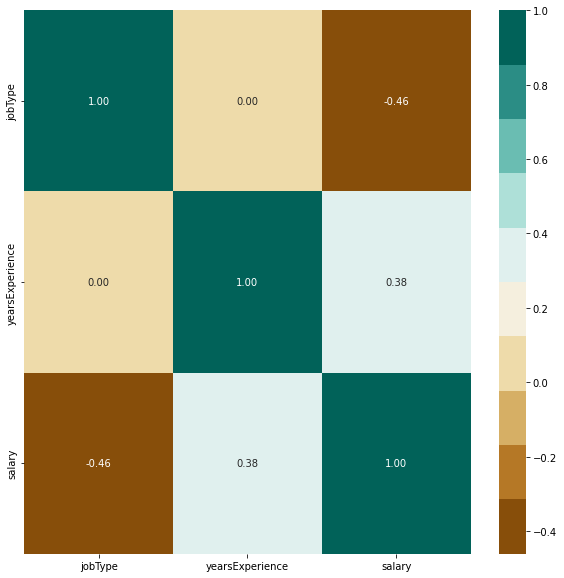

In [7]:
# wyznaczenie macierzy korelacji
correlation.matrix()

LR:  [0.5255349500713267, 0.6538871139510117, 0.5827269851312876, 0.7362]
SVM [0.5701854493580599, 0.6874785001719986, 0.6233624454148472, 0.7585]
RF:  [0.6062767475035663, 0.7605583392984968, 0.6747102714716622, 0.7951]
DT:  [0.608416547788873, 0.7633792733130481, 0.6771453520679526, 0.79665]
neural network [0.6604850213980028, 0.7243429286608261, 0.6909416504999253, 0.7929]


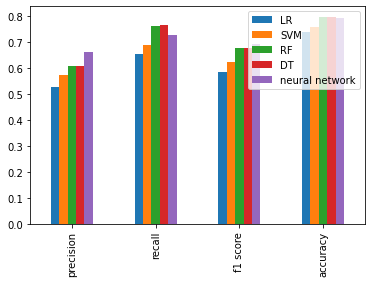

In [8]:
correlation.models()

In [9]:
correlation.correcting()

SVM gamma='auto' [0.600713266761769, 0.7677301731996353, 0.6740296118447379, 0.79635]
SVM kernel='sigmoid' [0.33437945791726104, 0.32569126024732525, 0.3299781797705356, 0.52405]
SVM degree=4 [0.5701854493580599, 0.6874785001719986, 0.6233624454148472, 0.7585]
